<a href="https://colab.research.google.com/github/SSingh087/PPM-numerical/blob/main/exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Student Name 

Write here your name

_**Please note**_

Save this notebook file with your name following this format : 

### Your_Name_EXERCICE_2.ipynb

No spaces, no accents, the only special characters allowed are - or _ 

Particular attention should be paid to the discussions of your results and to the proper and clean formatting of your notebook.

Always label your plots and give the units. Quote your numerical results with the appropriate units.

Make your code modular. Write and use functions whenever possible.

# Modelisation of planet atmosphere 

The aim of the following exercices is to understand the thermal structure of a planet, considering both the atmosphere an the interior.

## Atmospheric structure of Pluto Atmosphere 

Let assume we have a planet, located at some distance from its star. The planet has a radius $R_p$ a mass $R_p$ and a surface temperature $T_s$. The planet has at atmosphere made of a gas with average molar mass (mass of 1 mole) $\mu$
To star we will consider PLuto (even if this is not really a planet, but a dwarf planet).


We give below some useful numbers :

$R=8.31$ (constant if ideal gases)


$G=6.67 \times 10^{-11} m^3 kg^{-1} s^{-2}$: Universal gravitational constant.

The atmospheric gas is assumed to follow the ideal gas equation of state : 

$P=\rho R T / \mu$

With P=pressure, $\rho$=density (kg/m^3), T=temperature.  We introduce also $g$ the gravity acceleration at the base of the atmosphere (assumed to be constant): $g=GM_p/R_p^2$.

For the moment we consider the planet is PLUTO (eventhough it is not really considered as a planet, but as a 'dwarf planet'), so  we will use :
PLUTO DATA
$Mp=1.3e22 kg$, 

$Rp=1185 km$ 

and

$T_s=50 K$ (brrr... really cold !)

Surface pressure 

$P_s= 10 micro bar$

Atmospheric composition :N2

$\mu=14 g/mol$


For convenience, in the following, we call Z the altitude above the planet's surface and R the distance to planet's center,  so Z=R-Rp.


1) We want to compute the structure of the atmosphere, that is P(Z) (pressure as a function of Z). We will assume that the atmosphere is isothermal, so that T(Z)=cst=$T_S$.

Hydrostatic equilibrium tells us that :

$\frac{\partial P}{\partial Z}=-g\rho$

### Q1 :
What is the nature of the hydrostatic equilibrium equation ? Is it an ODE ? A PDE ? Why ?

Answer= ODE since $\frac{\partial P}{\partial Z}=-g(z)\rho(z)$ which is a function of one variable.


### Q2 :
using dimensional analysis with g, $\mu$, T, R build a quantity (we will call H) that has the dimension of a length. What is the meaning of H in your opinion ?

$H= Rg/$

### Q3
what is g for Pluto ?

Gives h for pluto and compare to the planet size. Is it correct to assume g constant ?




We now want to build a code that computes the P(Z) profile, assuming T=cst=$T_s$. We call $P_s$ the pressure at the surface of the planet (Z=0). $P_s= 1$ bar


Let call dZ the step in Z and $Z_i$=dZ*i. 

Let call 

$P_i=P(Z_i )$ , the pressure at altitude $Z_i$

and 

$\rho_i=P_i \mu/(R T_s)$, the density at altitude $Z_i$



Answer :

### Q4 (really easy)
Write a little piece of code that define all the constants of the problem, including g and H

In [12]:
R=8.31 
G=6.67e-11
Mp=1.3e22
Rp=1185e3
Ts=50
Ps=1
mu=14
g=9.81

### Q5

Write a function, called "deriv" that returns dP/dZ and takes in input P and the temperature of the atmosphere (a constant parameter of our problem but we will change later).

In [13]:
def deriv(P,T):
    rho = P*mu/(R*T)
    dpdz = -g*rho
    return dpdz

### Q6:
Choose an explicit numerical integration scheme of order 2 of your choice. How will you compute $P_{i+1}$ as a function of $P_i$ ?

YOUR ANSWER :
    

2nd order explicit Euler

### Q7
Write a code below that computes P(Z) between Z=0 and Z=Zmax(=2H) and call deriv(P). Choose dZ=H/100.

In [14]:
H = 50
dz = H/100
z = np.arange(0, 2*H, dz)
P = np.zeros(len(z))
P[0] = Ps
for i in range(len(z)-1):
    K = P[i] + dz/2*deriv(P[i],Ts)
    P[i+1] = P[i] + deriv(K,Ts)

### Q7.bis
Display P(Z) between Z=0 and Z=2H.

What is the Pressure at Z=2H ?


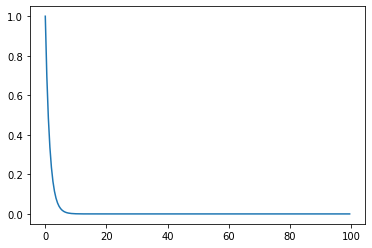

In [15]:
plt.plot(z, P)

### Q8
What is the pressure at 2=2H ?
P=

In [16]:
P[-1]

5.958814403040789e-32

Now we consider that Pluto is much "closer" to the Sun, and that the surface Temperature is T and is now a free parameter.

### Q8.bis

What would be the pressure at Z=2H for T=300K 



In [17]:
H = 50
dz = H/100
Ts = 300
z = np.arange(0, 2*H, dz)
P = np.zeros(len(z))
P[0] = Ps
for i in range(len(z)-1):
    K = P[i] + dz/2*deriv(P[i],Ts)
    P[i+1] = P[i] + deriv(K,Ts)
P[-1]   

1.4860860984261549e-05

### Q9
We want to compute the total mass of the atmosphere : Since the pressure at the surface the weight of the atmosphere
    divided by the planet surface what is $M_a$, the mass of the atmosphere (in Kg) as a function of $P_s$, T, g, $R_p$ ? give also the numerical value
    
    

$P = \frac{-3GM_p^2}{4\pi R_p^5}$

$M_a = P \times 4\pi Rp^2$

In [18]:
Ma=3*G*Mp**2/4*np.pi*Rp**5 * 4*np.pi*Rp**2

In [19]:
Ma

1.095120707504508e+78

## More realistic profile

Now we will consider that g changes with altitude. so that $g(Z)=GMp/(Rp+Z)^2$. Modify your function "deriv" (define above) so that g is now properly calculated in the code. Note that deriv now will take in input P, Z, T. We will call this function "deriv2"


In [20]:
def deriv2(P,T,Z):
    rho = P*mu/(R*T)
    gz = (G*Mp)/(Rp + Z)**2
    dpdz = -gz*rho
    return dpdz

### Q10 
Write a code that compute P(Z) with deriv2.



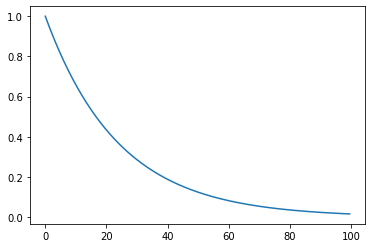

In [27]:
H = 50
dz = H/100
Ts = 50
z = np.arange(0, 2*H, dz)
P = np.zeros(len(z))
P[0] = Ps
for i in range(len(z)-1):
    K = P[i] + dz/2*deriv2(P[i],Ts,z[i])
    P[i+1] = P[i] + deriv2(K,Ts,dz/2+z[i])
plt.plot(z, P)    

### Q11
Compute P(Z) with deriv and deriv2. Display the resuls on the same graph . Is there much difference ? We should expect not much. Why ?

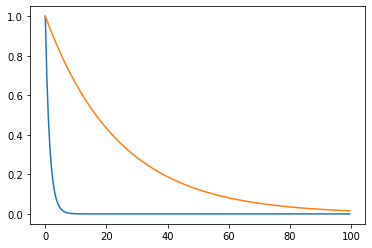

In [28]:
H = 50
dz = H/100
Ts = 50
z = np.arange(0, 2*H, dz)
P1 = np.zeros(len(z))
P1[0] = Ps

P2 = np.zeros(len(z))
P2[0] = Ps

for i in range(len(z)-1):
    K1 = P1[i] + dz/2*deriv(P1[i],Ts)
    P1[i+1] = P1[i] + deriv(K1,Ts)
    K2 = P2[i] + dz/2*deriv2(P2[i],Ts,z[i])
    P2[i+1] = P2[i] + deriv2(K2,Ts,dz/2+z[i])
plt.plot(z, P1)
plt.plot(z, P2)

### Q12 Atmospheric Escape

Now we imagine that the body (here Pluto) is at distance A from the sun, so that the planet's surface temperature is 


$T_s=300K*(1AU/A)^{-1/2}$, where $AU=150 \times 10^6 km$ (the "astronomical unit").


We want to compute the pressure not at 2H, but at a distance $\textbf{R_h}$ called the Hill Radius. $R_h$ is the "radius of gravitational reach of the planet". Any object closer than distance $R_h$ from the planet is "trapped" in orbit around the planet. Any object beyond distance  $R_h$ from  the planet is lost from the planet (and is put in orbit around the Sun).

$R_h=A\times \left( \frac{M_p}{3M_s} \right)^{1/3.}$.

Where $Ms$= Sun's mass=2e30 Kg

### Q13
PLot Rh (in units of planet Radius) and T(in K) as a function of the distance to the Star for 0.01<A<10 AU in log plot. The distance to the star will be plotted in astronomical units.


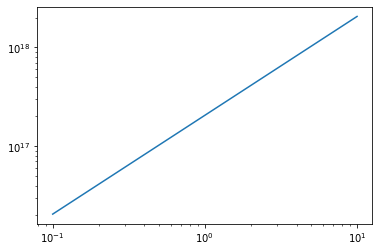

In [34]:
Ms = 2e30
A = np.linspace(0.1,10,10)
Rh = A * (Mp/3*Ms)**(1/3)
plt.loglog(A, Rh)

### Q14


Based on your precedent code (using deriv 2), define a function P_at_2H(T)  that returns The pressure at Z=R_h.


In [ ]:
def deriv2(P,T,Z):
    rho = P*mu/(R*T)
    gz = (G*Mp)/(Rp + Z)**2
    dpdz = -gz*rho
    return dpdz

P_at_2H(T) = lambda h: A * (Mp/3*Ms)**(1/3)

H = 50
dz = H/100
Ts = 50
z = np.arange(0, 2*H, dz)
P = np.zeros(len(z))
P[0] = Ps
for i in range(len(z)-1):
    K = P[i] + dz/2*deriv2(P[i],Ts,z[i])
    P[i+1] = P[i] + deriv2(K,Ts,dz/2+z[i])
plt.plot(z, P)    

### Q15
What is the pressure at Z=Rh for a a Pluto-Like object at 0.1, 1., 2. AU ?


### Q16 escape ?
We can consider as a simplified criterion that when P(R_h)> 0.01 Pascal, the atmosphere will escape from the planet through Jeans evaporation. The planet is then too hot, it looses its atmosphere.

At what distance from the Sun will that happen ?
You can find this distance either
(1) GRAPHICALLY or
(2) using a code you design that will find the distance A, from the sun, for which we have exactly the equation P(Rh)=0.01 Pa. You have to find the root of this equation.

Methods 2 will give you bonus points.



